https://cses.fi/problemset/task/1676/

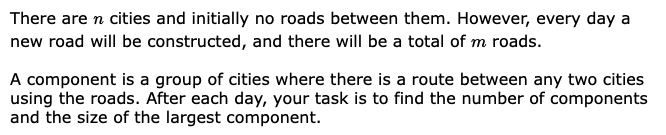

no. of components:    
size of the largest component:

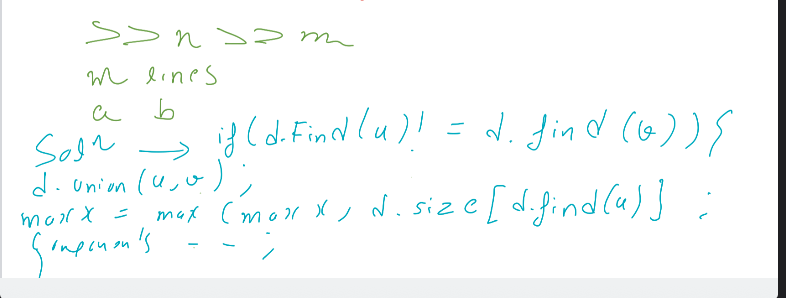

In [ ]:
void solve() {
    iinp(n);
    dsu d(n);
    iinp(m);
    ll components=n,maxx=1;
    for(ll i=0;i<m;i++){
        ll u,v;
        inp(u,v);
        u--,v--;
        if(d.findRoot(u)!=d.findRoot(v)){
            d.union_(u,v);
            maxx=max(maxx,d.size[d.findRoot(u)]);
            components--;
        }
        pri(components,maxx);
    }
    
}

https://codeforces.com/contest/1167/problem/C

In some social network, there are 𝑛 users communicating with each other in 𝑚 groups of friends.   
Let's analyze the process of distributing some news between users

One by one each user will be given news, find the total no. of person who knows it.

Then he or she sends the news to his or her friends (two users are friends if there is at least one group such that both of them belong to this group)

Friends continue sending the news to their friends, and so on. The process ends when there is no pair of friends such that one of them knows the news, and another one doesn't know.

you have to determine what is the number of users that will know the news if initially only user 𝑥
 starts distributing it.

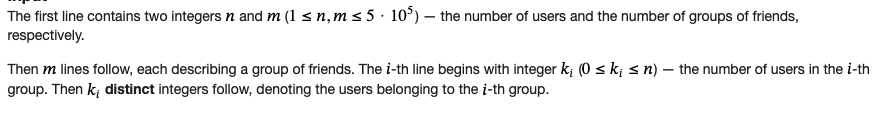

sol. 

The 𝑖-th integer should be equal to the number of users that will know the news if user 𝑖
starts distributing it.

In [ ]:
class dsu{
    public:
        vector<ll> par,size;
        dsu(ll n){
            for(ll i=0;i<n;i++){
                par.push_back(i);
                size.push_back(1);
            }
        }
 
        ll findRoot(ll node){
            if(par[node]==node) return node;
            return par[node]=findRoot(par[node]);
        }
 
        void union_(ll u, ll v){
            ll pu=findRoot(u), pv=findRoot(v);
            if(pu==pv) return ;
            if(size[pu]<size[pv]){
                par[pu]=pv;
                size[pv]+=size[pu];
            }
            else{
                par[pv]=pu;
                size[pu]+=size[pv];                
            }
        }
 
};
 
 
 
void solve() {
    ll n,m;
    inp(n,m);
    dsu d(n);
    for(ll i=0;i<m;i++){
        iinp(si);
        //size of the  group

        vinp(tmp,si);
        //group members
        for(ll i=0;i<=si-2;i++){
            d.union_(tmp[i]-1,tmp[i+1]-1);
        }        
    }
    for(ll i=0;i<n;i++){
        cout<<(d.size[d.findRoot(i)])<<" ";
    }
    pri();
}

# tough

https://codeforces.com/edu/course/2/lesson/7/1/practice/contest/289390/problem/C

the players fight the monsters and get the experience,     
. After the destruction of the monster, all the players of the team get the same amount of experience points.

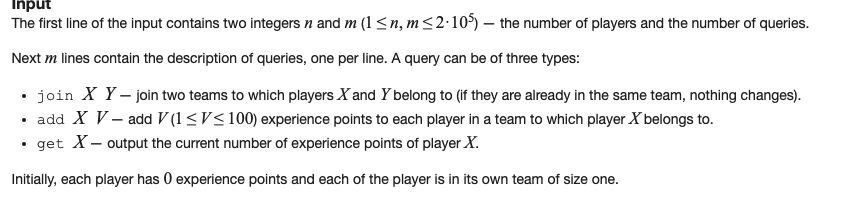

In [ ]:
void solve() {
    iinp(n);
    iinp(m);
    dsu d(n);
 
    for(ll i=0;i<m;i++){
        sinp(s);
        if(s=="join"){
            ll u,v;
            inp(u,v);
            u--,v--;
           d.union_(u,v);
        }
        else if(s=="add"){
            iinp(p);
            iinp(gain);
            p--; 
            d.pending[d.findRoot(p)]+=gain;
        }
        else{
            iinp(p);
            p--;
            pri(d.exp[p]+d.pending[d.findRoot(p)]);
        }
    }
}

In [ ]:
class dsu{
    public:
        vector<ll> par,size,exp,pending;
        vector<set<ll>> vos; 
        dsu(ll n){
            for(ll i=0;i<n;i++){
                par.push_back(i);
                size.push_back(1);
                exp.push_back(0);
                pending.push_back(0);
                vos.push_back({i});
            }
        }
 
        ll findRoot(ll node){
            if(par[node]==node){
                return node;
            } 
            return par[node]=findRoot(par[node]);
        }
 
        void union_(ll u, ll v){
            ll pu=findRoot(u), pv=findRoot(v);
            if(pu==pv){
                return;
            }
            if(size[pu]>=size[pv]){
                swap(pu,pv);  
            } 
            size[pv]+=size[pu];
            par[pu]=pv;
            ll add=pending[pu]-pending[pv];
            for(ll x: vos[pu]){
                exp[x]+=add;
                vos[pv].insert(x);
            }
            vos[pu].clear();
        }
 
};